# Multi variable comparison
Assessing both wave height and wind speed at the same time

In [20]:
import modelskill as ms

## Define observations
Below, the observations will take the default quantity names from the eum type of the item. Alternatively, the user can give another quantity name by providing the `quantity` argument.

In [21]:
# wave height
o1 = ms.PointObservation('../tests/testdata/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA_Hm0")
o2 = ms.PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL_Hm0")
o3 = ms.TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2_Hm0")

# wind speed
wind1 = ms.PointObservation('../tests/testdata/SW/HKNA_wind.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA_wind")
wind2 = ms.PointObservation('../tests/testdata/SW/F16_wind.dfs0', item=0, x=4.01222, y=54.1167, name="F16_wind")
wind3 = ms.TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=2, name="c2_wind")

In [22]:
o1.quantity

Quantity(name='Significant wave height', unit='m')

## Define model results
Two different simulation runs are used to create four model results:

In [23]:
fn1 = "../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu"
mr1Hm0 = ms.model_result(fn1, name='SW_1', item='Sign. Wave Height')
mr1WS = ms.model_result(fn1, name='SW_1', item='Wind speed')
fn2 = "../tests/testdata/SW/HKZN_local_2017_DutchCoast_v2.dfsu"
mr2Hm0 = ms.model_result(fn2, name='SW_2', item='Sign. Wave Height')
mr2WS = ms.model_result(fn2, name='SW_2', item='Wind speed')

In [24]:
mr1WS

<DfsuModelResult>: SW_1
Time: 2017-10-27 00:00:00 - 2017-10-29 18:00:00
Quantity: Wind speed [m/s]

## Connect model and observations and extract
We connect the observation item and model item by refering to the item name in the ModelResult. Item number can also be used.

In [25]:
cc1 = ms.match([o1, o2, o3], [mr1Hm0, mr2Hm0])
cc2 = ms.match([wind1, wind2, wind3], [mr1WS, mr2WS])
cc = cc1.merge(cc2)
cc

<ComparerCollection>
Comparers:
0: HKNA_Hm0 - Significant wave height [m]
1: EPL_Hm0 - Significant wave height [m]
2: c2_Hm0 - Significant wave height [m]
3: HKNA_wind - Wind speed [m/s]
4: F16_wind - Wind speed [m/s]
5: c2_wind - Wind speed [m/s]

In [26]:
cc.n_quantities

2

In [27]:
cc.quantity_names

['Significant wave height', 'Wind speed']

## Analysis
Now that the result has been extracted, we can do analysis. Multiple quantities means an extra level in the multi-index of the skill dataframe. 

In [28]:
sk = cc.skill()
sk.round(3)

n   bias   rmse  urmse    mae  \
model observation quantity                                                   
SW_1  HKNA_Hm0    Significant wave height  386 -0.202  0.355  0.292  0.256   
      EPL_Hm0     Significant wave height   67 -0.071  0.225  0.213  0.189   
      c2_Hm0      Significant wave height  113 -0.005  0.352  0.352  0.295   
      HKNA_wind   Wind speed               277 -0.924  1.305  0.922  1.054   
      F16_wind    Wind speed                67  2.070  2.753  1.815  2.175   
      c2_wind     Wind speed               113  0.395  0.611  0.467  0.488   
SW_2  HKNA_Hm0    Significant wave height  386 -0.109  0.294  0.273  0.215   
      EPL_Hm0     Significant wave height   67 -0.005  0.232  0.232  0.198   
      c2_Hm0      Significant wave height  113  0.078  0.431  0.424  0.359   
      HKNA_wind   Wind speed               277 -0.924  1.305  0.922  1.054   
      F16_wind    Wind speed                67  2.070  2.753  1.815  2.175   
      c2_wind     Wind speed               113  0.395  0.611  0.467  0.488   

                                              cc     si     r2  
model observation quantity                                      
SW_1  HKNA_Hm0    Significant wave height  0.972  0.094  0.904  
      EPL_Hm0     Significant wave height  0.970  0.082  0.932  
      c2_Hm0      Significant wave height  0.975  0.128  0.899  
      HKNA_wind   Wind speed               0.963  0.066  0.854  
      F16_wind    Wind speed               0.824  0.141  0.242  
      c2_wind     Wind speed               0.964  0.048  0.878  
SW_2  HKNA_Hm0    Significant wave height  0.972  0.088  0.934  
      EPL_Hm0     Significant wave height  0.970  0.090  0.928  
      c2_Hm0      Significant wave height  0.975  0.154  0.849  
      HKNA_wind   Wind speed               0.963  0.066  0.854  
      F16_wind    Wind speed               0.824  0.141  0.242  
      c2_wind     Wind speed               0.964  0.048  0.878

In [29]:
sk = cc.sel(quantity='Significant wave height').skill()
sk.style()

In [30]:
sk.sel(observation='c2_Hm0').style(columns='rmse')

,observation,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,,
SW_1,c2_Hm0,113,-0.005,0.352,0.352,0.295,0.975,0.128,0.899
SW_2,c2_Hm0,113,0.078,0.431,0.424,0.359,0.975,0.154,0.849


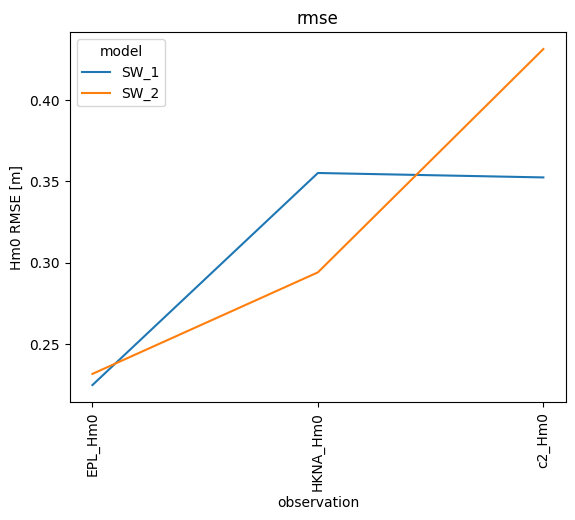

In [31]:
sk['rmse'].plot.line(ylabel='Hm0 RMSE [m]');

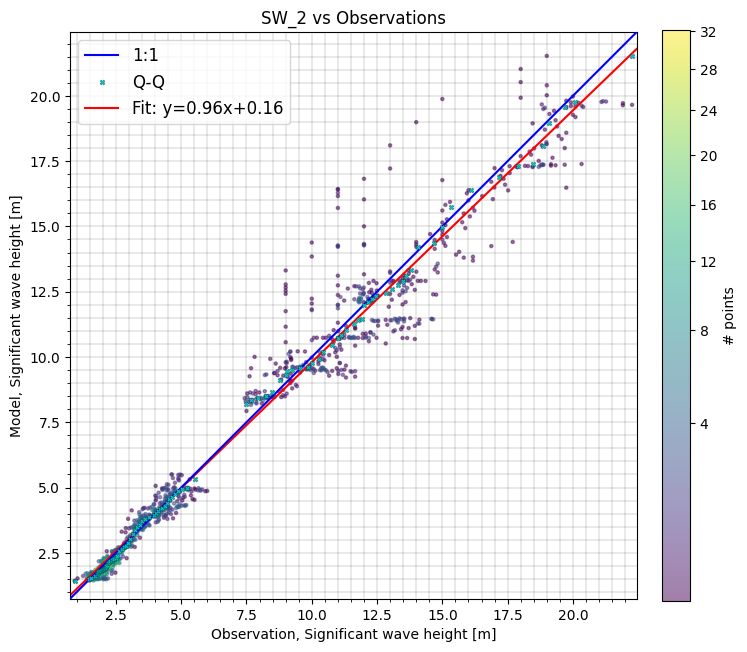

In [32]:
cc.sel(model=1).plot.scatter();

## mean skill
The `mean_skill()` method will return a weighted average of the skill score per model and quantity. You can get the "normal" mean_skill (per model) by selecting a specific quantity either by id or name.

In [33]:
sk = cc.mean_skill()
sk

n      bias      rmse     urmse       mae  \
model quantity                                                               
SW_1  Significant wave height  566 -0.092784  0.310863  0.285887  0.246693   
      Wind speed               457  0.513760  1.556650  1.068050  1.238843   
SW_2  Significant wave height  566 -0.012206  0.319088  0.309717  0.257481   
      Wind speed               457  0.513760  1.556650  1.068050  1.238844   

                                     cc        si        r2  
model quantity                                               
SW_1  Significant wave height  0.972173  0.101486  0.911489  
      Wind speed               0.916950  0.085296  0.657892  
SW_2  Significant wave height  0.972173  0.110542  0.903452  
      Wind speed               0.916950  0.085296  0.657892

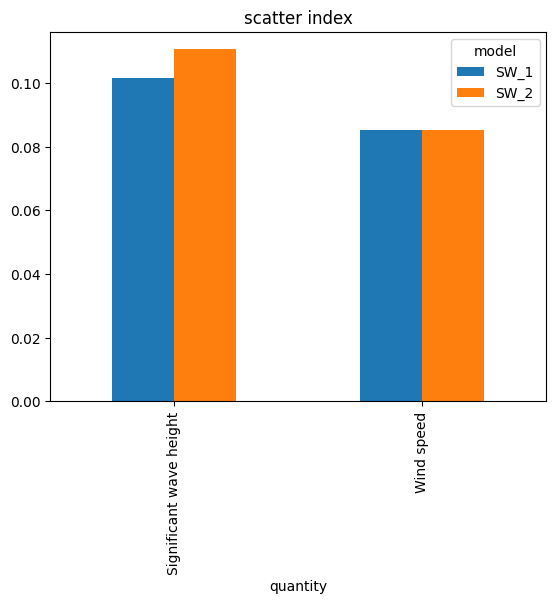

In [34]:
sk['si'].plot.bar(title='scatter index');

In [35]:
cc.sel(model='SW_2').mean_skill()

,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,
Significant wave height,566,-0.012206,0.319088,0.309717,0.257481,0.972173,0.110542,0.903452
Wind speed,457,0.513760,1.556650,1.068050,1.238844,0.916950,0.085296,0.657892


In [36]:
cc.sel(quantity='Significant wave height').mean_skill().style(columns=[])

,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,
SW_1,566,-0.093,0.311,0.286,0.247,0.972,0.101,0.911
SW_2,566,-0.012,0.319,0.310,0.257,0.972,0.111,0.903


## score

**Note:** The score is a single metric for each model, aggregating all quantities.

In [37]:
cc.score()

{"('SW_1', 'Significant wave height')": 0.31086282230301127,
 "('SW_1', 'Wind speed')": 1.5566499453419513,
 "('SW_2', 'Significant wave height')": 0.3190882445130369,
 "('SW_2', 'Wind speed')": 1.5566500338331128}

To get the score for a specific varibable, it is possible to filter using the `.sel` method.

In [38]:
cc.sel(quantity='Wind speed').score()

{'SW_1': 1.5566499453419513, 'SW_2': 1.5566500338331128}